In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd
import pvlib
from pvlib.location import Location
from sympy import *
from sympy.abc import x,y,z,u,v,w,t
from dtumathtools import *
init_printing()

> Find through literature search the recommended angle at which solar panels are installed in Denmark. The angle is said to be zero degrees if the panel lies flat on the ground (or roof).

The best angle in Copenhagen is $36^\circ$ when the solar panel is facing south.

Source: (Mark Z. Jacobson - World estimates of PV optimal tilt angles and ratios of sunlight incident upon tilted and tracked PV panels relative to horizontal panels) 
https://www.sciencedirect.com/science/article/pii/S0038092X1830375X

> Select a type of solar panel. You can search for installers in Denmark and investigate which panels they typically use, or you can google "solar panel datasheet" or similar. The solar panel should be a standard panel (flat and not curved, for example). Find a datasheet for the chosen solar panel, and describe the panel's size (using $L$ for length and $B$ for width) and indicate Wp/Pmax (referred to as max power, peak power watts, or similar) under the STC standard. Describe what the STC standard entails. Calculate $Wp/(L B)$ (according to the list of standard assumptions above). Assume ideal conditions: the sun is perpendicular to the solar panel, and the solar irradiance is $1100 W/m^2$ for an entire hour. How many joules and kilowatt-hours does the panel deliver in this hour? How many watt-hours is this per $m^2$?


> Your final report should also include an introductory section where you describe solar energy and solar cells. You determine what exactly the section should contain, but the sources below can be used to find information. It is recommended to write this section first once you have progressed further with the project. 

1. https://www.pveducation.org/
1. https://www.acs.org/education/resources/highschool/chemmatters/past-issues/archive-2013-2014/how-a-solar-cell-works.html

> Provide a formula or expression for the flux through the surface expressed in terms of $A_0$, $\pmb{u}_p, \pmb{V}, L$, and $B$. We define the flux to be zero if the angle between $\pmb{u}_p$ and $\pmb{V}$ is greater than $\pi/2$ (90 degrees), as we do not want negative flux. Your expression should account for this.

*Hint*: Since the normal vector is constant, you can get rid of the integral sign.


$ReLu(<u_p,V> \cdot A_0 \cdot L \cdot B \cdot)$

> Provide SI units for $\pmb{V}$, $L$, $B$, $A_0$, flux, and energy. Specify the relationship between $\mathrm{J}$ and $\mathrm{kWh}$.

> Write Python code that finds all function values in `f` in the interval $[-0.05, 0.05]$ and indicates the corresponding `t` values. 

> Write a Python function that can find both sign changes (zero crossings) of `f`.


> Write a Python function `def solar_elevation_angle(theta)` that, given $\theta$ in degrees, calculates $\alpha$ in degrees.

> Suppose the sun has a fixed distance $r_s$ to the Earth. Find a reasonable value for $r_s$. Provide a (mathematical) expression for how the sun's $xyz$-coordinates can be calculated from $r_s$, $\theta_s$, and $\phi_s$, where $\theta_s$ and $\phi_s$ are respectively the zenith and azimuth angles for the sun's position.

> Provide a (mathematical) expression for $\pmb{u}_p$ and for $\langle \pmb{u}_{s}, \pmb{u}_p \rangle$ based on the zenith and azimuth angles. You should simplify the expression so that it contains $\cos(\theta_p-\theta_s)$ and only 5 trigonometric functions. Show that $-1 \le \langle \pmb{u}_{s}, \pmb{u}_p \rangle \le 1$. Explain in your own words what it means when $\langle \pmb{u}_{s}, \pmb{u}_p \rangle < 0$.


> Write a Python function `def solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)` that returns $\langle \pmb{n}_{s}, \pmb{n}_p \rangle$ when it is positive and otherwise returns zero.

> Take another look at your Python function `def solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)`. Rewrite it so that it works on NumPy arrays of zenith and azimuth angles. You can test it on the following three situations, where the projection should yield $0.707107$, $0.0$, and $0.0$ (or rather, with numerical errors, it should give `array([7.07106781e-01, 6.12323400e-17, 0.0])`). Explain the orientation of the solar panel and the position of the sun in the three situations.



> Choose a location for your solar panel, for example, DTU. Update the above GPS coordinates (measured in DecimalDegrees), altitude, and name to match the chosen location.

55.785469, 12.519103

In [2]:
timezone = "Europe/Copenhagen"
start_date = "2024-04-20"
end_date = "2024-04-20"
delta_time = "H"  # "Min", "H", 

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.785469, 12.519103, timezone, 21, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_date + " 00:00:00", end_date + " 23:59:00", freq=delta_time, tz=timezone
)
#print(times)

sunpos = site.get_solarposition(times)


In [3]:
def solar_flux(i):
    #Defining angles in radians
    alpha = np.deg2rad(sunpos.apparent_elevation)
    azimuth = np.deg2rad(sunpos.azimuth)
    vector = (Matrix([cos(azimuth[i]),sin(azimuth[i]),tan(alpha[i])]))
    return(vector.normalized()*1100)

In [4]:
def panel_normal(azimuth,alpha):
    vector = (Matrix([cos(azimuth),sin(azimuth),tan(alpha)]))
    return(vector.normalized())

Here we have chosen to plot the solar angles for April 1st.

> Plot the zenith, azimuth, and elevation angles of the sun, i.e., $\theta_s, \phi_s, \alpha_s$, for the entire day of April 20, 2024, as a function of time.


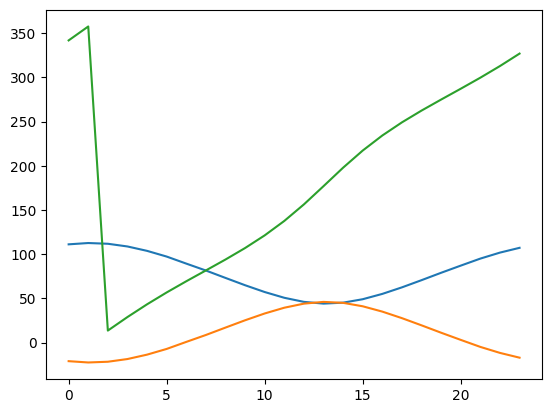

In [5]:
thet = sunpos.apparent_zenith
azim = sunpos.azimuth
alph = sunpos.apparent_elevation
time = []
for i in range(24):
    time.append(i)
plt.plot(time,thet)
plt.plot(time,alph)
plt.plot(time,azim)

> Plot the elevation angle of the sun and determine when the sun is highest during the day on April 20, 2024. Explain what it means when $\alpha_s < 0$ or $\theta_s > 90^\circ$.

explaining: sun is below the horizon

In [6]:
for i in range(len(alph)):
    if alph[i] == max(alph):
        indexi = i
        break
indexi

C:\Users\emils\AppData\Local\Temp\ipykernel_8172\156121367.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if alph[i] == max(alph):


> Find the time of sunrise and sunset at DTU on April 20, 2024. Compare with "known" values such as those from DMI. *Hint:* If you want precise values, you should use `apparent_elevation` (apparent sun elevation accounting for atmospheric refraction) instead of `elevation`. You do not need to account for the curvature of the Earth.


In [7]:
for i in range(len(alph)):
    if alph[i] < 0 and alph[i+1] >= 0:
        sunri = i +1
    if alph[i] >0 and alph[i+1] <=0:
        sunse = i+1
        break
display(sunri,sunse)

C:\Users\emils\AppData\Local\Temp\ipykernel_8172\936295048.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if alph[i] < 0 and alph[i+1] >= 0:
C:\Users\emils\AppData\Local\Temp\ipykernel_8172\936295048.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if alph[i] >0 and alph[i+1] <=0:


> Find the highest point of the sun in the sky (in degrees) on the summer solstice at DTU, and when during the day it occurs? *Hint:* You will need to change the start and end dates for the `sunpos` object.

In [8]:
timezone = "Europe/Copenhagen"
start_date = "2024-04-20"
end_date = "2024-09-20"
delta_time = "Min"  # "Min", "H", 

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.785469, 12.519103, timezone, 21, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_date + " 00:00:00", end_date + " 23:59:00", freq=delta_time, tz=timezone
)
#print(times)

sunpos = site.get_solarposition(times)
maximum=sunpos.apparent_elevation.max()
for i in range(len(sunpos.apparent_elevation)):
    if sunpos.apparent_elevation[i] == maximum:
        display(i%24)
        display(maximum)
        break

C:\Users\emils\AppData\Local\Temp\ipykernel_8172\3780263234.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sunpos.apparent_elevation[i] == maximum:


> Create a Python function that can calculate the highest point of the sun $\alpha_{max}$ in the sky (in degrees) on a given date (year-month-day) at a given location (e.g., city) specified by latitude and longitude. *Hint:* The answer should not depend on longitude, as the highest point of the sun in the sky depends only on latitude.

In a previous task, you found an expression for the sun's $xyz$ coordinates from $r_s$, $\theta_s$, and $\phi_s$.

> Write a Python function (for use with NumPy arrays) that converts from the sun's zenith and azimuth to the sun's position given in $xyz$ coordinates. Remember whether you are working in radians or degrees. The `np.deg2rad()` function may be useful. It's fine to use an approximate value for $r_{s}$, but you can find a more accurate value with: `pvlib.solarposition.nrel_earthsun_distance(times) * 149597870700`, where `149597870700` is the number of meters in an astronomical unit (AU).

In [9]:
def sunloc(azimuth,alpha,r):
    #Defining angles in radians
    alpha = np.deg2rad(sunpos.apparent_elevation)
    azimuth = np.deg2rad(sunpos.azimuth)
    vector = (Matrix([cos(azimuth[i]),sin(azimuth[i]),tan(alpha[i])]))
    return(vector.normalized()*r)
sunloc(180,57,149597870700)

C:\Users\emils\AppData\Local\Temp\ipykernel_8172\3161461169.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vector = (Matrix([cos(azimuth[i]),sin(azimuth[i]),tan(alpha[i])]))


⎡-80022621850.6196⎤
⎢                 ⎥
⎢-226379198.812321⎥
⎢                 ⎥
⎣126395615677.859 ⎦

> Write a Python function that converts from the sun's position in the sky to zenith and azimuth (in degrees or radians) in $xyz$ coordinates. The `np.arctan2(y, x)` and `np.rad2deg()` functions may be useful.

> Create a Python function that can calculate the flux of the sun's vector field through the solar panel's surface for each minute throughout the day. You should use `solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)`. Remember to only include solar zenith angles $\theta_s \in [0, \pi/2]$ (why?) so that the panel's flux is zero if the $\theta_s$ values (in a vector like `sunpos.loc[chosen_date].zenith`) are above $\pi/2$, i.e., 90 degrees.

C:\Users\emils\AppData\Local\Temp\ipykernel_8172\519136880.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if alph[i] < 0 and alph[i+1] >= 0:
C:\Users\emils\AppData\Local\Temp\ipykernel_8172\519136880.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if alph[i] >0 and alph[i+1] <=0:
C:\Users\emils\AppData\Local\Temp\ipykernel_8172\879285340.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vector = (Matrix([cos(azimuth[i]),s

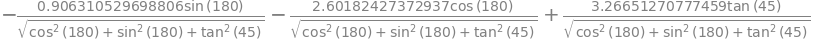

In [29]:
def fluxfunct(azimuth_p,alpha_p,A0,L,B):
    Energy = 0
    Panel = panel_normal(azimuth_p,alpha_p)
    Sunvis = False
    alph = sunpos.apparent_elevation
    for i in range(len(alph)-1):
        if alph[i] < 0 and alph[i+1] >= 0:
            Sunvis = True
        if alph[i] >0 and alph[i+1] <=0:
            sunse = i+1
            Sunvis = False
        if Sunvis == True:
            Energy += max(0,Panel.dot(solar_flux(i)))*A0*L*B
    return Energy
timezone = "Europe/Copenhagen"
start_date = "2024-04-20"
end_date = "2024-04-20"
delta_time = "H"  # "Min", "H", 

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.785469, 12.519103, timezone, 21, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_date + " 00:00:00", end_date + " 23:59:00", freq=delta_time, tz=timezone
)
#print(times)

sunpos = site.get_solarposition(times)
fluxfunct(180,45,0.5,1,1)/1000



> Point the solar panel towards the south, i.e., azimuth angle $\phi_p = 180^\circ$. Calculate the energy production for April 20th for each *integer* angle $\theta_p$ between 0 and 90 degrees.


C:\Users\emils\AppData\Local\Temp\ipykernel_8172\519136880.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if alph[i] < 0 and alph[i+1] >= 0:
C:\Users\emils\AppData\Local\Temp\ipykernel_8172\519136880.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if alph[i] >0 and alph[i+1] <=0:
C:\Users\emils\AppData\Local\Temp\ipykernel_8172\879285340.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vector = (Matrix([cos(azimuth[i]),s

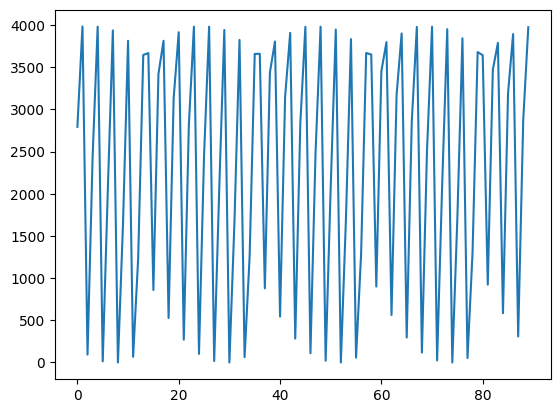

In [34]:
angle = []
energy = []
for alpha in range(0,90):
    angle.append(alpha)
    energy.append(fluxfunct(180,alpha,0.5,1,1))
plt.plot(angle,energy)

> Point the solar panel towards the south, i.e., azimuth angle $\phi_p = 180^\circ$. Calculate the energy production for the entire year 2024 for each *integer* angle $\theta_p$ between 0 and 90 degrees.

> Find the optimal angle $\theta_p$ and indicate the energy production. How much less is the energy production if $\phi_p$ is, for example, $175^\circ$ or similar?


> Set up a realistic configuration of $X$ number of solar panels, where you choose $X$ according to a typical setup on a single-family house. Solar panels are set up at the optimal angle. Calculate the energy production for each day and plot this as a function of time (specified in days).